# Model Selection
Bayesian Optimization for model selection to maximize accuracy.

In [1]:
from src.classifier.ThreadedBayesianSearcher import ThreadedBayesianSearcher
from src.classifier.BayesianTabularModelSearch import BayesianSearcher
from src.classifier.CustomTabularModel import CustomTabularModel
from src.recommender.BayesianRecommender import BayesianRecommender
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
bayesian_optimizer = BayesianSearcher(20)
model = CustomTabularModel(0.5, False, 1000, {'layer1': 20, 'layer2': 20, 'dropout': 0.5})
bayesian_optimizer.run_optimization(model, {'layer1': (1, 400), 'layer2': (1, 400), 'layer3': (1, 400), 'dropout': (0, 1)})
bayesian_optimizer.run_optimization(model, {'layer1': (1, 400), 'layer2': (1, 400), 'dropout': (0, 1)})
bayesian_optimizer.run_optimization(model, {'layer1': (1, 400), 'dropout': (0, 1)})

epoch,train_loss,valid_loss,accuracy,time
0,0.714697,0.733345,0.153191,00:00
1,0.700964,0.689279,0.787234,00:00
2,0.678350,0.614829,0.846808,00:00
3,0.641843,0.464846,0.846808,00:00
4,0.616526,0.429177,0.846808,00:00
5,0.593125,0.435818,0.846808,00:00


Epoch 6: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.668308,0.602233,0.815603,00:00
1,0.667041,0.603691,0.815603,00:00
2,0.660125,0.602610,0.815603,00:00
3,0.658464,0.598177,0.815603,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.683295,0.687443,0.813239,00:00
1,0.682735,0.685674,0.813239,00:00
2,0.681555,0.681522,0.813239,00:00
3,0.678176,0.671846,0.813239,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.701297,0.757907,0.184397,00:00
1,0.699864,0.751004,0.184397,00:00
2,0.699161,0.738762,0.184397,00:00
3,0.693851,0.720949,0.184397,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.722986,0.695898,0.189125,00:00
1,0.725009,0.694655,0.189125,00:00
2,0.723637,0.689450,0.810875,00:00
3,0.718639,0.679725,0.810875,00:00
4,0.713728,0.663059,0.810875,00:00
5,0.705036,0.639105,0.810875,00:00


Epoch 6: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.634322,0.616756,0.815603,00:00
1,0.624604,0.616880,0.815603,00:00
2,0.629340,0.612870,0.815603,00:00
3,0.635216,0.604741,0.815603,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.654337,0.800200,0.179669,00:00
1,0.673088,0.791316,0.179669,00:00
2,0.688670,0.779138,0.179669,00:00
3,0.680284,0.757933,0.179669,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.748936,0.789213,0.184397,00:00
1,0.753416,0.778448,0.184397,00:00
2,0.737822,0.762439,0.184397,00:00
3,0.730187,0.739436,0.184397,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.637481,0.707224,0.177305,00:00
1,0.658376,0.701833,0.177305,00:00
2,0.661809,0.693447,0.177305,00:00
3,0.657739,0.680367,0.822695,00:00
4,0.651852,0.658649,0.822695,00:00
5,0.643809,0.628607,0.822695,00:00
6,0.629801,0.593540,0.822695,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.737376,0.664750,0.810875,00:00
1,0.734073,0.665216,0.810875,00:00
2,0.729431,0.659929,0.810875,00:00
3,0.725727,0.648335,0.810875,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.644013,0.696395,0.170213,00:00
1,0.651302,0.688454,0.834515,00:00
2,0.604173,0.675556,0.834515,00:00
3,0.558436,0.653595,0.834515,00:00
4,0.517315,0.626279,0.834515,00:00


Epoch 5: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.728140,0.678859,0.817967,00:00
1,0.695837,0.675416,0.817967,00:00
2,0.670939,0.667738,0.817967,00:00
3,0.639652,0.653027,0.817967,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.716458,0.679230,0.810875,00:00
1,0.679943,0.673730,0.810875,00:00
2,0.651727,0.661796,0.810875,00:00
3,0.619370,0.645243,0.810875,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.702388,0.662502,0.813239,00:00
1,0.666302,0.659098,0.813239,00:00
2,0.620260,0.649277,0.813239,00:00
3,0.584300,0.630316,0.813239,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.706691,0.698490,0.184397,00:00
1,0.686471,0.694023,0.184397,00:00
2,0.676305,0.684178,0.815603,00:00
3,0.668205,0.666226,0.815603,00:00
4,0.654000,0.640602,0.815603,00:00
5,0.650105,0.611059,0.815603,00:00


Epoch 6: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.708524,0.671312,0.820331,00:00
1,0.699526,0.666836,0.820331,00:00
2,0.673734,0.656745,0.820331,00:00
3,0.658345,0.638961,0.820331,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.702725,0.672922,0.813239,00:00
1,0.695439,0.670322,0.813239,00:00
2,0.676129,0.662085,0.813239,00:00
3,0.676108,0.648221,0.813239,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.721872,0.679090,0.808511,00:00
1,0.697707,0.677398,0.808511,00:00
2,0.692776,0.671152,0.808511,00:00
3,0.683826,0.662011,0.808511,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.729541,0.714119,0.186761,00:00
1,0.703403,0.710944,0.186761,00:00
2,0.700675,0.701640,0.189125,00:00
3,0.689111,0.684992,0.813239,00:00
4,0.664865,0.661129,0.813239,00:00
5,0.655476,0.638606,0.813239,00:00
6,0.636273,0.608959,0.813239,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.683058,0.674670,0.827423,00:00
1,0.628468,0.672865,0.827423,00:00
2,0.616028,0.666943,0.827423,00:00
3,0.593918,0.655673,0.827423,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.300484,0.467712,0.822695,00:00
1,0.392477,0.467697,0.822695,00:00
2,0.438687,0.467685,0.822695,00:00
3,0.473527,0.467703,0.822695,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.927797,0.861728,0.177305,00:00
1,0.950195,0.863844,0.177305,00:00
2,0.936231,0.864987,0.177305,00:00
3,0.909700,0.869660,0.179669,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.822216,0.804431,0.186761,00:00
1,0.820102,0.804439,0.186761,00:00
2,0.825868,0.803261,0.186761,00:00
3,0.820679,0.801612,0.186761,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.814612,0.815009,0.182033,00:00
1,0.820207,0.813820,0.182033,00:00
2,0.825535,0.810898,0.182033,00:00
3,0.830259,0.805895,0.182033,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.673483,0.645985,0.808511,00:00
1,0.668534,0.646929,0.808511,00:00
2,0.664796,0.647156,0.808511,00:00
3,0.661283,0.646029,0.808511,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.750387,0.771591,0.177305,00:00
1,0.755685,0.770128,0.177305,00:00
2,0.760038,0.767377,0.177305,00:00
3,0.755968,0.763143,0.177305,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.594898,0.483555,0.827423,00:00
1,0.578715,0.483587,0.827423,00:00
2,0.540655,0.483082,0.827423,00:00
3,0.546354,0.482396,0.827423,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.461817,0.556955,0.806147,00:00
1,0.470344,0.556325,0.806147,00:00
2,0.478694,0.555177,0.806147,00:00
3,0.482410,0.553613,0.806147,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.688355,0.697868,0.177305,00:00
1,0.685631,0.696743,0.177305,00:00
2,0.684519,0.694779,0.177305,00:00
3,0.683895,0.691500,0.822695,00:00
4,0.685789,0.686684,0.822695,00:00
5,0.683597,0.680688,0.822695,00:00
6,0.680026,0.673648,0.822695,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.757989,0.728780,0.177305,00:00
1,0.790714,0.729661,0.177305,00:00
2,0.801642,0.730428,0.177305,00:00
3,0.810523,0.737702,0.177305,00:00


Epoch 4: early stopping
Finished
Keeping results: {'target': 0.8174941003322601, 'params': {'dropout': 0.36049303573428904, 'layer1': 287.2621889448561, 'layer2': 179.9018316584037, 'layer3': 273.91930190659644}}


epoch,train_loss,valid_loss,accuracy,time
0,0.688813,0.593705,0.810875,00:00
1,0.672800,0.588003,0.810875,00:00
2,0.669758,0.585013,0.813239,00:00
3,0.662047,0.585177,0.815603,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.921179,0.877416,0.177305,00:00
1,0.861755,0.872964,0.177305,00:00
2,0.918853,0.872273,0.177305,00:00
3,0.908967,0.867283,0.177305,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.971994,0.997033,0.174941,00:00
1,0.980185,0.998644,0.174941,00:00
2,0.973341,0.997031,0.174941,00:00
3,0.965111,0.992491,0.174941,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.604326,0.504997,0.822695,00:00
1,0.570478,0.505314,0.822695,00:00
2,0.558462,0.505043,0.822695,00:00
3,0.550315,0.504074,0.822695,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.489317,0.514222,0.813239,00:00
1,0.479861,0.514544,0.813239,00:00
2,0.460700,0.514367,0.813239,00:00
3,0.464351,0.513479,0.813239,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.861574,0.847174,0.189125,00:00
1,0.868003,0.846228,0.189125,00:00
2,0.878757,0.843978,0.189125,00:00
3,0.883368,0.840185,0.189125,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.592239,0.477930,0.829787,00:00
1,0.606878,0.477078,0.829787,00:00
2,0.629183,0.476826,0.829787,00:00
3,0.637710,0.476965,0.829787,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.953506,0.849679,0.177305,00:00
1,0.955298,0.846648,0.177305,00:00
2,0.958691,0.841866,0.177305,00:00
3,0.945073,0.834828,0.177305,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.579567,0.557557,0.825059,00:00
1,0.588295,0.557073,0.825059,00:00
2,0.591436,0.556027,0.825059,00:00
3,0.596060,0.554652,0.825059,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.590648,0.582925,0.808511,00:00
1,0.594108,0.582104,0.808511,00:00
2,0.578470,0.581345,0.808511,00:00
3,0.576696,0.580259,0.808511,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.665122,0.652671,0.822695,00:00
1,0.657136,0.650210,0.822695,00:00
2,0.650063,0.643817,0.822695,00:00
3,0.637946,0.634104,0.822695,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.660684,0.689518,0.801418,00:00
1,0.642212,0.686984,0.801418,00:00
2,0.685272,0.678442,0.806147,00:00
3,0.680940,0.662928,0.815603,00:00
4,0.660905,0.645884,0.803783,00:00
5,0.648383,0.630578,0.801418,00:00
6,0.637113,0.610618,0.801418,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.680591,0.719924,0.184397,00:00
1,0.659952,0.716718,0.184397,00:00
2,0.627658,0.707868,0.184397,00:00
3,0.610736,0.692792,0.621749,00:00
4,0.583935,0.668122,0.768322,00:00
5,0.557911,0.631362,0.791962,00:00
6,0.532075,0.591815,0.794326,00:00
7,0.557852,0.559281,0.808511,00:00
8,0.542007,0.530463,0.813239,00:00
9,0.529987,0.504173,0.815603,00:00


Epoch 11: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.702099,0.708403,0.200946,00:00
1,0.691819,0.705784,0.208038,00:00
2,0.695215,0.700939,0.212766,00:00
3,0.690161,0.690050,0.595745,00:00
4,0.679789,0.674408,0.808511,00:00
5,0.670286,0.655367,0.808511,00:00
6,0.652227,0.634057,0.808511,00:00
7,0.636189,0.610363,0.808511,00:00


Epoch 8: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.651264,0.652898,0.806147,00:00
1,0.648232,0.650430,0.806147,00:00
2,0.631016,0.645218,0.806147,00:00
3,0.626167,0.635990,0.806147,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.725334,0.711927,0.174941,00:00
1,0.726556,0.708356,0.174941,00:00
2,0.715246,0.700740,0.174941,00:00
3,0.692249,0.689584,0.803783,00:00
4,0.652115,0.675031,0.806147,00:00
5,0.646988,0.656635,0.806147,00:00
6,0.614993,0.637226,0.810875,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.664584,0.708055,0.179669,00:00
1,0.707679,0.703442,0.179669,00:00
2,0.726722,0.696303,0.439716,00:00
3,0.710805,0.687331,0.791962,00:00
4,0.687259,0.678346,0.787234,00:00
5,0.672568,0.668489,0.787234,00:00
6,0.656264,0.658010,0.784870,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.700774,0.691944,0.827423,00:00
1,0.675984,0.691658,0.827423,00:00
2,0.686876,0.687940,0.827423,00:00
3,0.685172,0.679978,0.827423,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.731723,0.696783,0.215130,00:00
1,0.705279,0.692869,0.567376,00:00
2,0.679064,0.685005,0.803783,00:00
3,0.657566,0.670894,0.806147,00:00
4,0.628620,0.650536,0.803783,00:00
5,0.663107,0.630540,0.808511,00:00


Epoch 6: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.758037,0.653452,0.820331,00:00
1,0.728649,0.651967,0.820331,00:00
2,0.683954,0.645981,0.820331,00:00
3,0.637899,0.632962,0.817967,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.690351,0.691731,0.815603,00:00
1,0.684564,0.686238,0.815603,00:00
2,0.683158,0.669784,0.815603,00:00
3,0.677891,0.648932,0.815603,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.713053,0.604129,0.822695,00:00
1,0.711182,0.601162,0.822695,00:00
2,0.708156,0.586695,0.822695,00:00
3,0.704336,0.558261,0.822695,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.749713,0.763016,0.179669,00:00
1,0.740943,0.758785,0.179669,00:00
2,0.724379,0.751465,0.179669,00:00
3,0.713087,0.727903,0.179669,00:00
4,0.706213,0.687171,0.765957,00:00
5,0.683416,0.632056,0.820331,00:00
6,0.670304,0.573121,0.820331,00:00
7,0.658776,0.521709,0.820331,00:00
8,0.650551,0.489531,0.820331,00:00


Epoch 9: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.714607,0.679942,0.815603,00:00
1,0.716424,0.674882,0.815603,00:00
2,0.712792,0.663467,0.815603,00:00
3,0.712560,0.649609,0.815603,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.711224,0.814521,0.179669,00:00
1,0.713419,0.808147,0.179669,00:00
2,0.712218,0.799585,0.179669,00:00
3,0.707702,0.782384,0.179669,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.702136,0.890743,0.179669,00:00
1,0.697307,0.870209,0.179669,00:00
2,0.690302,0.845309,0.179669,00:00
3,0.682945,0.804776,0.179669,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.694052,0.741115,0.179669,00:00
1,0.693921,0.733027,0.179669,00:00
2,0.690051,0.718790,0.179669,00:00
3,0.684209,0.692053,0.820331,00:00
4,0.677614,0.649987,0.820331,00:00
5,0.670126,0.599813,0.820331,00:00
6,0.651361,0.542026,0.820331,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.684704,0.631319,0.813239,00:00
1,0.683279,0.629798,0.813239,00:00
2,0.681922,0.622147,0.813239,00:00
3,0.679712,0.606359,0.813239,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.686917,0.770116,0.182033,00:00
1,0.685496,0.759197,0.182033,00:00
2,0.682685,0.737270,0.182033,00:00
3,0.683190,0.711664,0.182033,00:00
4,0.672570,0.665601,0.817967,00:00
5,0.659867,0.603271,0.817967,00:00
6,0.647646,0.540645,0.817967,00:00
7,0.626704,0.493080,0.817967,00:00


Epoch 8: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.694658,0.685649,0.813239,00:00
1,0.697352,0.684561,0.813239,00:00
2,0.693985,0.678581,0.813239,00:00
3,0.687118,0.658308,0.813239,00:00


Epoch 4: early stopping
Finished
Keeping results: {'target': 0.8115839242935181, 'params': {'dropout': 0.531041045008388, 'layer1': 257.8577693090355, 'layer2': 114.59873517131032}}


epoch,train_loss,valid_loss,accuracy,time
0,0.697922,0.704791,0.191489,00:00
1,0.694191,0.700800,0.191489,00:00
2,0.689420,0.689990,0.721040,00:00
3,0.685912,0.669769,0.808511,00:00
4,0.676947,0.644329,0.803783,00:00
5,0.664300,0.607433,0.808511,00:00
6,0.642323,0.566955,0.808511,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.680609,0.674866,0.799054,00:00
1,0.657823,0.670552,0.808511,00:00
2,0.655660,0.661380,0.803783,00:00
3,0.645391,0.648152,0.801418,00:00
4,0.648956,0.629963,0.813239,00:00
5,0.625028,0.608191,0.808511,00:00
6,0.613050,0.574002,0.810875,00:00
7,0.588257,0.539798,0.820331,00:00


Epoch 8: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.710828,0.709901,0.297872,00:00
1,0.701377,0.705394,0.371158,00:00
2,0.692920,0.693705,0.652482,00:00
3,0.679753,0.681396,0.789598,00:00
4,0.672091,0.653525,0.806147,00:00
5,0.666176,0.644523,0.796690,00:00
6,0.638350,0.636975,0.789598,00:00
7,0.608915,0.609412,0.789598,00:00


Epoch 8: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.683491,0.686792,0.817967,00:00
1,0.661498,0.681187,0.820331,00:00
2,0.646494,0.668848,0.822695,00:00
3,0.642382,0.651596,0.825059,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.760158,0.694101,0.704492,00:00
1,0.753417,0.687221,0.773050,00:00
2,0.740280,0.672483,0.803783,00:00
3,0.720828,0.652215,0.817967,00:00
4,0.701133,0.627689,0.817967,00:00
5,0.693423,0.598321,0.817967,00:00
6,0.670857,0.567464,0.817967,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.767285,0.700624,0.191489,00:00
1,0.747615,0.695489,0.236407,00:00
2,0.736299,0.683657,0.827423,00:00
3,0.719509,0.664592,0.827423,00:00
4,0.686264,0.635068,0.827423,00:00
5,0.669587,0.596015,0.827423,00:00


Epoch 6: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.709127,0.672941,0.815603,00:00
1,0.710192,0.667115,0.822695,00:00
2,0.694741,0.655059,0.822695,00:00
3,0.680580,0.637537,0.822695,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.739514,0.716736,0.257683,00:00
1,0.731654,0.710562,0.267139,00:00
2,0.718069,0.696695,0.359338,00:00
3,0.703954,0.677335,0.586288,00:00
4,0.694633,0.653830,0.791962,00:00
5,0.675354,0.624490,0.808511,00:00
6,0.657721,0.580969,0.825059,00:00
7,0.644293,0.544881,0.825059,00:00
8,0.620356,0.515997,0.825059,00:00
9,0.593242,0.489318,0.825059,00:00


Epoch 10: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.708216,0.708522,0.210402,00:00
1,0.716046,0.701960,0.248227,00:00
2,0.707941,0.688865,0.761229,00:00
3,0.704144,0.669153,0.815603,00:00
4,0.694386,0.640187,0.815603,00:00
5,0.678491,0.607067,0.815603,00:00
6,0.660812,0.568512,0.815603,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.696036,0.702649,0.219858,00:00
1,0.700447,0.698467,0.234043,00:00
2,0.697422,0.689246,0.692671,00:00
3,0.688763,0.668626,0.799054,00:00
4,0.677903,0.647468,0.806147,00:00
5,0.658019,0.607928,0.810875,00:00
6,0.640783,0.567046,0.810875,00:00
7,0.625508,0.535346,0.810875,00:00
8,0.603055,0.507411,0.810875,00:00


Epoch 9: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.717402,0.614377,0.820331,00:00
1,0.731690,0.613542,0.820331,00:00
2,0.722041,0.611132,0.820331,00:00
3,0.705632,0.606041,0.820331,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.760311,0.764525,0.189125,00:00
1,0.769708,0.761836,0.189125,00:00
2,0.766676,0.755167,0.189125,00:00
3,0.768250,0.744924,0.189125,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.655165,0.635593,0.813239,00:00
1,0.671342,0.635170,0.813239,00:00
2,0.664229,0.632937,0.813239,00:00
3,0.655207,0.628411,0.813239,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.689145,0.675664,0.822695,00:00
1,0.681097,0.674108,0.822695,00:00
2,0.679540,0.670044,0.822695,00:00
3,0.679220,0.663594,0.822695,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.736573,0.644070,0.815603,00:00
1,0.742396,0.642619,0.815603,00:00
2,0.740483,0.639335,0.815603,00:00
3,0.698958,0.633698,0.815603,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.700217,0.665485,0.765957,00:00
1,0.663254,0.664646,0.765957,00:00
2,0.678287,0.658626,0.775414,00:00
3,0.668174,0.649463,0.789598,00:00
4,0.658469,0.636815,0.801418,00:00
5,0.645145,0.623103,0.806147,00:00
6,0.633571,0.607492,0.810875,00:00
7,0.626508,0.587623,0.813239,00:00
8,0.611570,0.570714,0.815603,00:00
9,0.595599,0.555994,0.815603,00:00


Epoch 11: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.826768,0.751036,0.186761,00:00
1,0.827798,0.749050,0.186761,00:00
2,0.835603,0.744201,0.186761,00:00
3,0.828651,0.736020,0.186761,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.681718,0.664557,0.817967,00:00
1,0.666860,0.663418,0.817967,00:00
2,0.662884,0.660179,0.817967,00:00
3,0.661715,0.654696,0.817967,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.638165,0.629360,0.815603,00:00
1,0.643618,0.628241,0.815603,00:00
2,0.638928,0.624898,0.815603,00:00
3,0.632786,0.619192,0.815603,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.663533,0.655794,0.817967,00:00
1,0.665340,0.654410,0.817967,00:00
2,0.667746,0.651151,0.817967,00:00
3,0.659992,0.645356,0.817967,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.745855,0.683815,0.791962,00:00
1,0.751782,0.678113,0.827423,00:00
2,0.729471,0.665367,0.827423,00:00
3,0.702470,0.644732,0.827423,00:00
4,0.670574,0.613723,0.827423,00:00


Epoch 5: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.735915,0.693013,0.347518,00:00
1,0.719608,0.687999,0.524823,00:00
2,0.708601,0.678272,0.791962,00:00
3,0.694998,0.658785,0.801418,00:00
4,0.683326,0.632398,0.808511,00:00
5,0.664692,0.597130,0.806147,00:00
6,0.639025,0.548043,0.810875,00:00
7,0.608675,0.505459,0.810875,00:00


Epoch 8: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.714242,0.699649,0.219858,00:00
1,0.715515,0.695479,0.267139,00:00
2,0.698766,0.685301,0.803783,00:00
3,0.674948,0.667324,0.815603,00:00
4,0.656033,0.637874,0.815603,00:00
5,0.640485,0.596883,0.815603,00:00
6,0.625773,0.553906,0.813239,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.713518,0.688078,0.718676,00:00
1,0.733265,0.677507,0.761229,00:00
2,0.696872,0.659180,0.808511,00:00
3,0.666419,0.638219,0.815603,00:00
4,0.637443,0.612715,0.810875,00:00
5,0.634207,0.583876,0.815603,00:00


Epoch 6: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.682115,0.670110,0.820331,00:00
1,0.704663,0.667815,0.820331,00:00
2,0.698049,0.661050,0.803783,00:00
3,0.681138,0.647223,0.777778,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.742226,0.716846,0.193853,00:00
1,0.732597,0.711165,0.191489,00:00
2,0.722661,0.696741,0.274232,00:00
3,0.712068,0.672139,0.810875,00:00
4,0.705256,0.642468,0.810875,00:00
5,0.689941,0.609100,0.806147,00:00
6,0.668615,0.569280,0.810875,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.708525,0.710549,0.196217,00:00
1,0.694852,0.705734,0.238771,00:00
2,0.692934,0.694640,0.489362,00:00
3,0.688194,0.675548,0.796690,00:00
4,0.676995,0.645323,0.799054,00:00
5,0.660329,0.606062,0.810875,00:00
6,0.640922,0.559248,0.810875,00:00
7,0.611830,0.515867,0.810875,00:00
8,0.579991,0.488308,0.810875,00:00


Epoch 9: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.708435,0.664702,0.810875,00:00
1,0.694837,0.660348,0.810875,00:00
2,0.684354,0.649839,0.810875,00:00
3,0.676070,0.632433,0.810875,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.737530,0.694595,0.260047,00:00
1,0.729013,0.689468,0.820331,00:00
2,0.707520,0.678549,0.820331,00:00
3,0.697226,0.660630,0.820331,00:00
4,0.688087,0.634579,0.820331,00:00


Epoch 5: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.701701,0.665222,0.820331,00:00
1,0.692653,0.660537,0.820331,00:00
2,0.689083,0.650181,0.820331,00:00
3,0.685135,0.634785,0.820331,00:00


Epoch 4: early stopping
Finished
Keeping results: {'target': 0.8170212745666504, 'params': {'dropout': 0.417022004702574, 'layer1': 288.4094728834211}}


In [3]:
def maximization_function(**params: dict):
    """
    The function whose value we want to maximize.

    :param params: The parameters to set to the model
    :return: The value of the metric used by the model to define its performance.
             Expected to be the validation acc.
    """
    params['early_stopping'] = False
    model.reset_params(params)
    return model.train(epochs=20, k=1)

In [4]:
x = [{'layer1': i} for i in range(2, 400, 50)]
y = [maximization_function(**layer_size) for layer_size in x]

epoch,train_loss,valid_loss,accuracy,time
0,0.736958,0.759258,0.184397,00:00
1,0.750183,0.757604,0.184397,00:00
2,0.757526,0.754179,0.184397,00:00
3,0.756678,0.748908,0.184397,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.677982,0.661874,0.820331,00:00
1,0.660829,0.659261,0.820331,00:00
2,0.660269,0.653355,0.820331,00:00
3,0.657144,0.644475,0.820331,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.756026,0.736832,0.184397,00:00
1,0.749809,0.732887,0.184397,00:00
2,0.733469,0.724437,0.189125,00:00
3,0.731895,0.710347,0.200946,00:00
4,0.723857,0.690095,0.439716,00:00
5,0.707768,0.664127,0.822695,00:00
6,0.693859,0.634938,0.820331,00:00
7,0.680349,0.604626,0.820331,00:00
8,0.657363,0.572740,0.820331,00:00


Epoch 9: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.732607,0.715276,0.191489,00:00
1,0.736232,0.710818,0.198582,00:00
2,0.728678,0.700498,0.257683,00:00
3,0.719693,0.684203,0.619385,00:00
4,0.703646,0.661688,0.756501,00:00
5,0.687918,0.634989,0.820331,00:00
6,0.690469,0.607386,0.820331,00:00
7,0.667727,0.578586,0.820331,00:00
8,0.647920,0.550358,0.820331,00:00


Epoch 9: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.719441,0.686906,0.692671,00:00
1,0.697443,0.683717,0.758865,00:00
2,0.688247,0.675756,0.803783,00:00
3,0.675811,0.662459,0.815603,00:00
4,0.669514,0.642428,0.820331,00:00
5,0.654372,0.618798,0.820331,00:00
6,0.639344,0.590855,0.820331,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.704983,0.664181,0.815603,00:00
1,0.696800,0.660868,0.820331,00:00
2,0.688626,0.651283,0.820331,00:00
3,0.677082,0.635440,0.820331,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.670903,0.663224,0.820331,00:00
1,0.647447,0.659451,0.820331,00:00
2,0.644057,0.650343,0.820331,00:00
3,0.641955,0.634390,0.820331,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.750689,0.699342,0.179669,00:00
1,0.728330,0.694035,0.614657,00:00
2,0.710332,0.681513,0.810875,00:00
3,0.693162,0.660985,0.820331,00:00
4,0.671138,0.631434,0.820331,00:00
5,0.647266,0.593155,0.820331,00:00


Epoch 6: early stopping


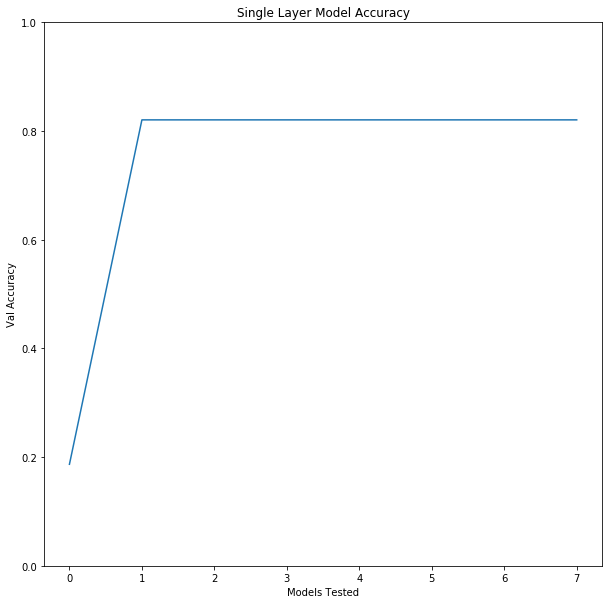

In [5]:
x_i = list(range(0, len(x)))

plt.figure(figsize=(10,10))
plt.title("Single Layer Model Accuracy")
plt.ylim((0, 1))
plt.xlabel("Models Tested")
plt.ylabel("Val Accuracy")
plt.plot(x_i, y)

In [6]:
def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)

    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma


def plot_gp(optimizer, x, y):
    fig = plt.figure(figsize=(10, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontdict={'size': 30}
    )

    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])

    x_obs = np.array([[res["params"]["layer1"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])

    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]),
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
              alpha=.6, fc='c', ec='None', label='95% confidence interval')

    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f( layer1 )', fontdict={'size': 20})
    axis.set_xlabel('layer1', fontdict={'size': 20})

    utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
    utility = utility_function.utility(x, optimizer._gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15,
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size': 20})
    acq.set_xlabel('layer1', fontdict={'size': 20})

    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

epoch,train_loss,valid_loss,accuracy,time
0,0.857918,0.702123,0.304965,00:00
1,0.815066,0.697303,0.382979,00:00
2,0.776231,0.686069,0.619385,00:00
3,0.771679,0.670247,0.820331,00:00
4,0.751701,0.651130,0.820331,00:00
5,0.732226,0.628428,0.820331,00:00
6,0.716814,0.601998,0.820331,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.655337,0.671511,0.820331,00:00
1,0.658676,0.667708,0.820331,00:00
2,0.669314,0.658936,0.820331,00:00
3,0.669071,0.645530,0.820331,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.704964,0.705495,0.226950,00:00
1,0.706569,0.697649,0.340426,00:00
2,0.699269,0.685611,0.671395,00:00
3,0.705553,0.672021,0.810875,00:00
4,0.696996,0.651579,0.813239,00:00
5,0.686388,0.624828,0.813239,00:00
6,0.672544,0.597062,0.813239,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.703940,0.703375,0.189125,00:00
1,0.715096,0.700223,0.198582,00:00
2,0.724524,0.693024,0.394799,00:00
3,0.718717,0.679734,0.817967,00:00
4,0.708576,0.661271,0.817967,00:00
5,0.698851,0.638557,0.817967,00:00
6,0.690981,0.614027,0.817967,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.771365,0.682249,0.827423,00:00
1,0.745857,0.677631,0.827423,00:00
2,0.742310,0.667674,0.827423,00:00
3,0.731575,0.652815,0.827423,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.640817,0.656974,0.815603,00:00
1,0.652660,0.655041,0.815603,00:00
2,0.656608,0.649841,0.815603,00:00
3,0.645300,0.640638,0.810875,00:00


Epoch 4: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.725509,0.705900,0.196217,00:00
1,0.738189,0.702264,0.200946,00:00
2,0.740235,0.693885,0.468085,00:00
3,0.729175,0.680421,0.803783,00:00
4,0.718266,0.662568,0.803783,00:00
5,0.709218,0.639507,0.803783,00:00
6,0.695534,0.612193,0.803783,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.722984,0.706854,0.189125,00:00
1,0.726125,0.701762,0.212766,00:00
2,0.718530,0.690368,0.359338,00:00
3,0.703363,0.672543,0.820331,00:00
4,0.700701,0.649800,0.825059,00:00
5,0.705621,0.623939,0.825059,00:00
6,0.686152,0.595636,0.825059,00:00


Epoch 7: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.706367,0.718072,0.191489,00:00
1,0.702212,0.715120,0.191489,00:00
2,0.701459,0.710666,0.205674,00:00
3,0.696388,0.707700,0.366430,00:00
4,0.698687,0.701711,0.749409,00:00
5,0.691048,0.675212,0.794326,00:00
6,0.675027,0.639234,0.806147,00:00
7,0.660218,0.596379,0.813239,00:00
8,0.654463,0.558682,0.815603,00:00
9,0.637534,0.538710,0.815603,00:00


Epoch 10: early stopping


epoch,train_loss,valid_loss,accuracy,time
0,0.772114,0.681974,0.747045,00:00
1,0.741898,0.678243,0.791962,00:00
2,0.725741,0.669602,0.815603,00:00
3,0.707233,0.655618,0.815603,00:00
4,0.685608,0.637290,0.803783,00:00
5,0.679083,0.615783,0.803783,00:00


Epoch 6: early stopping


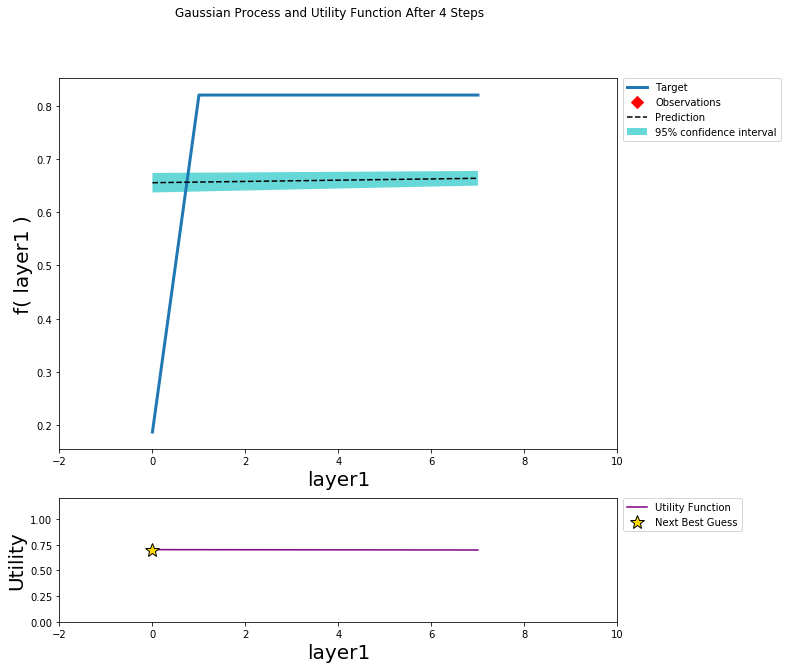

In [7]:
bayesian_optimizer.optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bayesian_optimizer.optimizer, np.array(x_i).reshape(-1, 1), y)

# Recommendation
Via Baysian Optimization, find the params that need to change to reduce the likelihood someone experience depression.

In [25]:
from src.recommender.JSONParamReader import JSONParamReader
import pprint
import warnings
from pandas.io.json import json
import pandas as pd
from bayes_opt import BayesianOptimization, Events, JSONLogger
from fastai.basic_data import DataBunch, Tensor
import numpy as np
from src.classifier.CustomTabularModel import CustomTabularModel
from src.data.DataCsvInterface import DataCsvInterface
from src.recommender.JSONParamReader import JSONParamReader

warnings.simplefilter(action='ignore', category=FutureWarning)

bayesian_optimizer = BayesianRecommender()
# Init the model with the best params
model = CustomTabularModel(0.5, False, 1000, {'layer1': 20, 'layer2': 20})
best_params = JSONParamReader('classifier/logs').get_best_param()
model.reset_params(best_params)
pp = pprint.PrettyPrinter(indent=4)
print("        Using Model Architecture")
pp.pprint( best_params)

        Using Model Architecture
{'dropout': 0.4170220047, 'layer1': 288.4094728834}


In [26]:
data = model.input_data.train_ds[0][0]
data_parsed = []
for element in data.data:
    if type(element) is Tensor:
        data_parsed += list(element.numpy())
    else:
        data_parsed += element


data_init = {key: data_parsed[i] for i, key in enumerate(data.names)}
cr = bayesian_optimizer.get_ranges(data.names, model.input_data.train_ds)
column_range = {key: cr[key] for key in cr if key not in DataCsvInterface.FIXED_NAMES}
model.train(90)

epoch,train_loss,valid_loss,accuracy,time
0,0.675767,0.658606,0.846808,00:00
1,0.664987,0.645669,0.846808,00:00
2,0.654010,0.630003,0.846808,00:00
3,0.644451,0.604866,0.846808,00:00


Epoch 4: early stopping


0.8468084931373596

In [27]:
bayesian_optimizer.run_optimization(model, data_init, column_range)

Value to maximize: 0.4999523162841797
Value to maximize: 0.5003073215484619
Value to maximize: 0.500303328037262
Value to maximize: 0.5007879734039307
Value to maximize: 0.5008745789527893
Value to maximize: 0.5008864402770996
Keeping results: {'target': 0.5008864402770996, 'params': {'bodyweight_categorical': 1.0850132308450688, 'depressed_categorical': 2.9361659231999284, 'edu_level_categorical': 3.722764174374958, 'employment_categorical': 1.3035851241440028, 'friends': 3.9945746100373665, 'gender_categorical': 1.0, 'income_categorical': 1.0870035421055428, 'income_float': 1.3967942175852635, 'pay_for_sex_categorical': 1.0466278587617235, 'prostitution_legal_categorical': 1.0768838754090093, 'race_categorical': 1.0084664602164604, 'sexuallity_categorical': 1.6822567688459231, 'social_fear_categorical': 3.562019916620608, 'virgin_categorical': 1.0339087550946944}}
[{'target': 0.5008864402770996, 'params': {'bodyweight_categorical': 1.0850132308450688, 'depressed_categorical': 2.93616

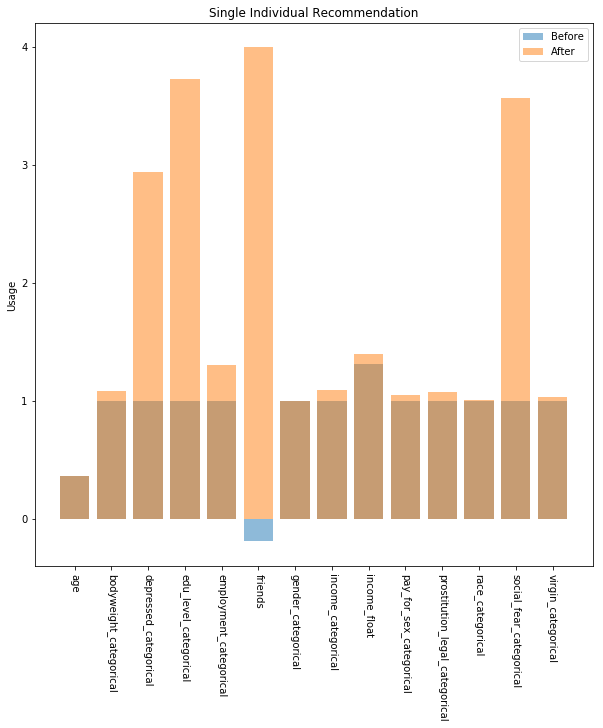

In [64]:
after_data = bayesian_optimizer.results[0]['params']

# Sort both dictionaries by keys
data_init = {i:data_init[i] for i in sorted(data_init.keys())}
after_data = {i:after_data[i] for i in sorted([_ for _ in after_data.keys() if _ != 1]) 
              if i != 1}

# Exclude changing your sexuality lol
del data_init['sexuallity_categorical']
del after_data['sexuallity_categorical']


# Before Data
feature_data = [data_init[_] for _ in data_init]
feature_pos = list(range(len(feature_data)))
objects = [_ for _ in data_init]
# Fill in any missing data for running predictions
for key in data_init:
    if key not in after_data:
        print("    "+ str(key))
        after_data[key] = data_init[key]

after_feature_data = [after_data[_] for _ in after_data]
after_feature_pos = list(range(len(after_feature_data)))
after_objects = [_ for _ in after_data]

plt.figure(figsize=(10, 10))
b1 = plt.bar(feature_pos, feature_data, align='center', alpha=0.5)
b2 = plt.bar(after_feature_pos, after_feature_data, align='center', alpha=0.5)
plt.xticks(feature_pos, objects, rotation=-90)
plt.ylabel('Usage')
plt.title('Single Individual Recommendation')
plt.legend((b1[0], b2[0]), ('Before', 'After'))
plt.show()

In [62]:
data_init

{'age': 0.36457014,
 'bodyweight_categorical': 1,
 'depressed_categorical': 1,
 'edu_level_categorical': 1,
 'employment_categorical': 1,
 'friends': -0.19225857,
 'gender_categorical': 1,
 'income_categorical': 1,
 'income_float': 1.3152382,
 'pay_for_sex_categorical': 1,
 'prostitution_legal_categorical': 1,
 'race_categorical': 1,
 'sexuallity_categorical': 1,
 'social_fear_categorical': 1,
 'virgin_categorical': 1}

In [78]:
changes = np.abs(np.subtract(feature_data, after_feature_data))
directions = np.sign(np.subtract(feature_data, after_feature_data))

In [73]:
n = 3
max_categories = np.argsort(changes)[-n:][::-1]

In [ ]:
model.input_data.train_dl